In [17]:
import pandas as pd
import numpy as np
import sqlite3
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [21]:
df = pd.read_csv('movies.csv')
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [23]:
# NumPy usage: Add a runtime column
df['runtime_minutes'] = np.random.randint(80, 180, size=len(df))
np.mean(df['runtime_minutes'])

129.64189481441136

In [27]:
# Statistics module usage
statistics.median(df['runtime_minutes'])

130

In [29]:
# SQL usage with sqlite3
conn = sqlite3.connect(':memory:')
df.to_sql('movies', conn, index=False, if_exists='replace')

query_result = pd.read_sql_query("""
SELECT genres, AVG(runtime_minutes) AS avg_runtime
FROM movies
GROUP BY genres
ORDER BY avg_runtime DESC
LIMIT 5
""", conn)
query_result

,genres,avg_runtime
0,Crime|Horror|Romance,179.0
1,Crime|Fantasy|Horror,179.0
2,Comedy|Film-Noir|Thriller,179.0
3,Comedy|Fantasy|Mystery|Sci-Fi,179.0
4,Comedy|Documentary|Drama|Mystery,179.0


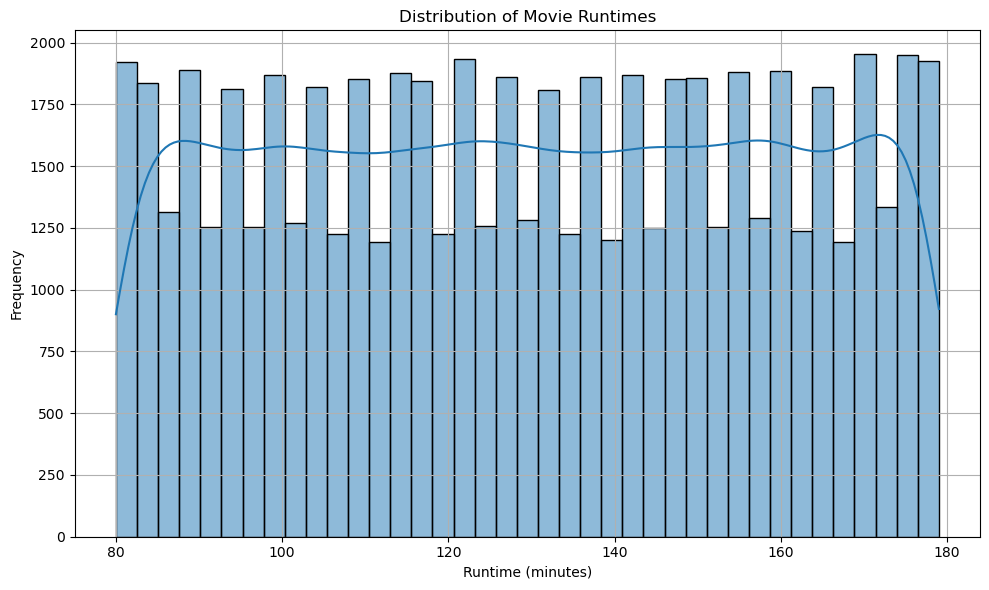

In [31]:
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime_minutes'], kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

#### END